# Irregular pooling

On electoral colleges, gerrymandering, and other similar phenomena.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Splitting in almost-equal arrays

def split(x, k=2):
    m = len(x) // k + 1
    return [x[i*k : (i+1)*k] for i in range(m) if i*k<len(x)]

for i in range(3,13):
    print(split(list(range(i)), 3))

[[0, 1, 2]]
[[0, 1, 2], [3]]
[[0, 1, 2], [3, 4]]
[[0, 1, 2], [3, 4, 5]]
[[0, 1, 2], [3, 4, 5], [6]]
[[0, 1, 2], [3, 4, 5], [6, 7]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]


In [97]:
np.round(0.5) # Remember that rounding is weird in computers; 50/50 vote is always 0

0.0

In [187]:
def hierarchical_vote(votes, breaks=2, verbal=False):
    """Sequentially breaks the vote into BREAKS groups, selects representative"""
    k = len(votes)
    x = np.array(votes) # Just a copy
    while k>1:
        if verbal:
            print(x)
        if len(x)<=breaks:
            return np.round(np.mean(x))
        # groups = np.split(reps, breaks) # Doesn't work k/breaks isn't whole
        groups = split(x, breaks)
        x = [np.round(np.mean(a)) for a in groups]
        k = len(x)
    return x

hierarchical_vote([0,0,0,0,1,1,0,1,1], 3, verbal=True)

[0 0 0 0 1 1 0 1 1]
[0.0, 1.0, 1.0]


1.0

...................................................

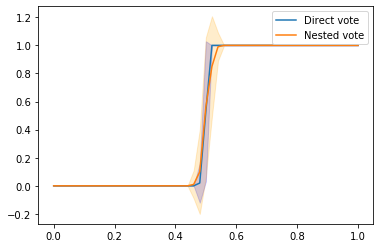

In [198]:
Npeople = np.power(5,5)
Nexperiments = 100
Nvalues = 51

direct_m = np.zeros(Nvalues)
direct_s = np.zeros(Nvalues)
nested_m = np.zeros(Nvalues)
nested_s = np.zeros(Nvalues)
ps = np.linspace(0, 1, Nvalues)
for ip in range(len(ps)):
    print('.', end='')
    direct = []
    nested = []
    for iexp in range(Nexperiments):
        x = np.floor(np.random.rand(Npeople)+ps[ip])
        direct.append(np.round(np.mean(x)))
        nested.append(hierarchical_vote(x, 5))
    direct_m[ip] = np.mean(direct)
    direct_s[ip] = np.std(direct)
    nested_m[ip] = np.mean(nested)
    nested_s[ip] = np.std(nested)

plt.plot(ps, direct_m, '-', label='Direct vote');
plt.fill_between(ps, direct_m - direct_s, direct_m + direct_s, color='blue', alpha=0.2)
plt.plot(ps, nested_m, '-', label='Nested vote');
plt.fill_between(ps, nested_m - nested_s, nested_m + nested_s, color='orange', alpha=0.2)
plt.legend();